In [1]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import imblearn
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import scikitplot as skplt

In [2]:
#Read csv file
df_orig = pd.read_csv("./adult.data", sep = ',')
df = df_orig

In [3]:
df.shape

(32560, 15)

In [4]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
#Variable names are definitely not right... Let's try that, again
#Create a list of column names
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
            'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
#Read csv file
df_orig = pd.read_csv("./adult.data", sep = ',', names = col_names, header = None)
df = df_orig
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#Yay! Now Let's do some exploratory data analysis.
df.shape

(32561, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
#Let's get to digging
#raceeth has several values, let's look at that
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [10]:
#Looks like ? are used for null values..
df.replace('?', np.NaN)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [12]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [13]:
# Creating a function which will remove extra leading 
# and tailing whitespace from the data.
# pass dataframe as a parameter here
def whitespace_remover(dataframe):
    
    # iterating over the columns
    for i in dataframe.columns:
          
        # checking datatype of each columns
        if dataframe[i].dtype == 'object':
              
            # applying strip function on column
            dataframe[i] = dataframe[i].map(str.strip)
        else:
              
            # if condn. is False then it will do nothing.
            pass
  
# applying whitespace_remover function on dataframe
whitespace_remover(df)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
#Check to see if we messed anything up
df.shape

(32561, 15)

In [15]:
#Just double checking
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [16]:
#Now replace ? marks with null values
df[df == '?'] = np.NaN

In [17]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [18]:
#Okay, much better... Now let's look at some of the other strings
categories = ['education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']

for i in categories:
    print(i)
    print(df[i].value_counts())

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv   

In [19]:
#Nothing else is jumping out as null.. What percent of data is missing
print(1836/32561)

0.05638647461687295


In [20]:
#I can live with 5.6%
df = df.dropna()
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [21]:
#Let's go ahead and give income some more information since this our target variable (1 for true, 0 for false)
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

<ipython-input-21-f12881b54c1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income']=df['income'].map({'<=50K': 0, '>50K': 1})


Data Analysis

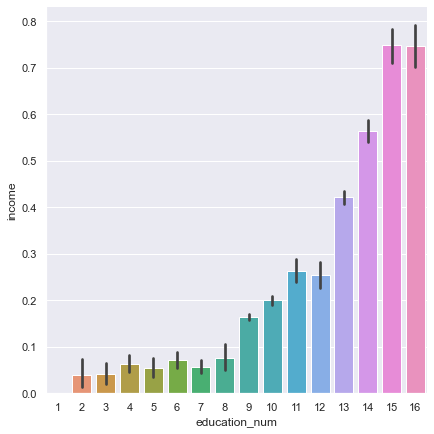

In [23]:
sns.catplot(x='education_num',y='income',data=df,kind='bar',height=6)
plt.show()

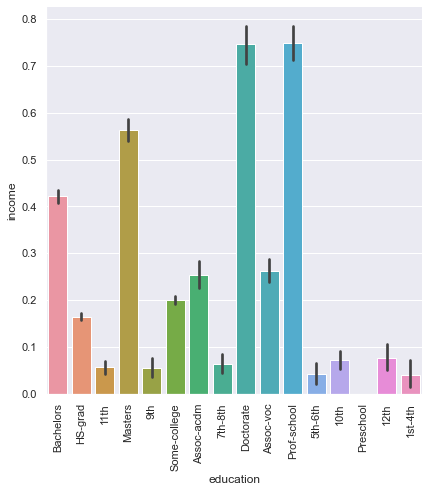

In [24]:
#Education vs income
g = sns.catplot(x='education',y='income',data=df,kind='bar',height=6)
g.set_xticklabels(rotation=90)

Looks like education and education_num tell us the same thing

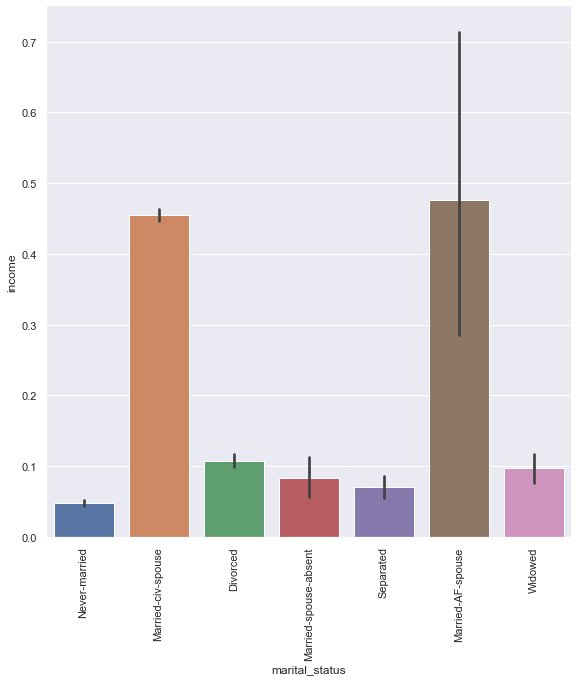

In [25]:
#marital.status vs income
g = sns.catplot(x='marital_status',y='income',data=df,kind='bar',height=8)
g.set_xticklabels(rotation=90)

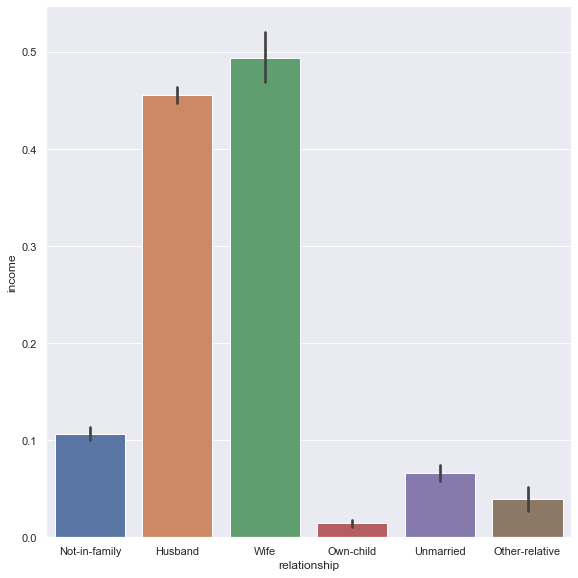

In [26]:
#Relationship vs income
sns.catplot(x='relationship',y='income',data=df,kind='bar',height=8)
plt.show()

Looks like relationship and marital status are similar in shape and probably tell us the same thing

In [27]:
#Let's focus on marital status, and make this a little easier... Single or Married

df['marital_status']=df['marital_status'].map({'Married-civ-spouse':'Married', 'Divorced':'Single', 'Never-married':'Single', 'Separated':'Single', 
'Widowed':'Single', 'Married-spouse-absent':'Married', 'Married-AF-spouse':'Married'})

<ipython-input-27-5a4f8bac8114>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital_status']=df['marital_status'].map({'Married-civ-spouse':'Married', 'Divorced':'Single', 'Never-married':'Single', 'Separated':'Single',


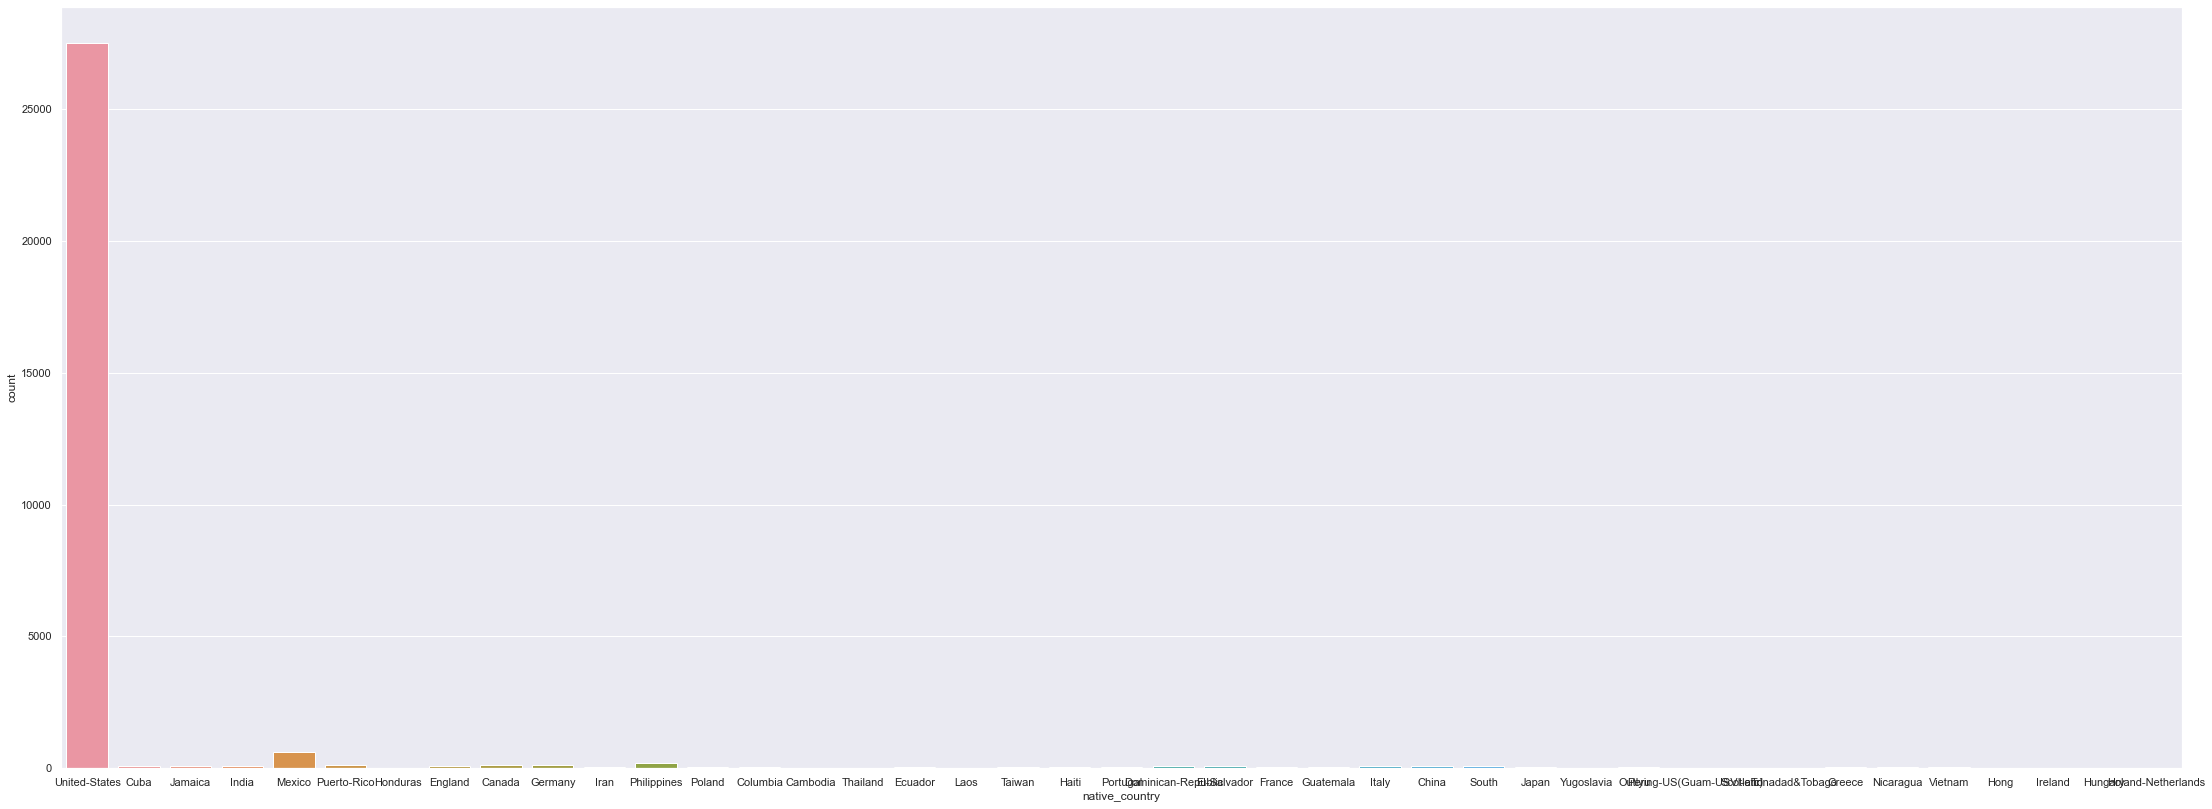

In [28]:
#explore which country do most people belong
plt.figure(figsize=(38,14))
sns.countplot(x='native_country',data=df)
plt.show()

Since most people are from the US, we can probably drop this column

In [29]:
#Label Encoding

for column in df:
    enc=LabelEncoder()
    if df.dtypes[column]==np.object:
         df[column]=enc.fit_transform(df[column])

<ipython-input-29-7f0ea0bd0bd4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=enc.fit_transform(df[column])


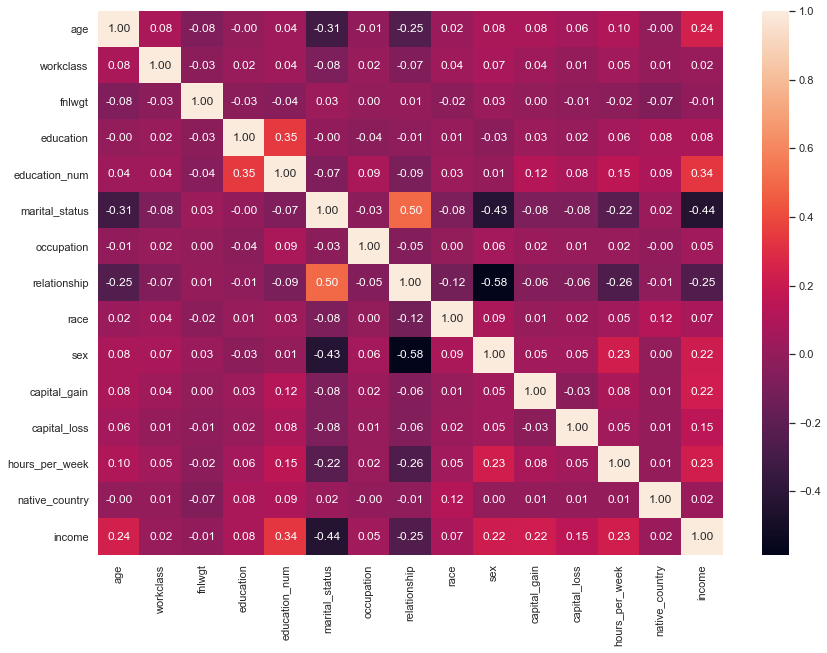

In [30]:
#Correlation Matrix using heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

As expected, 'education' and 'education_num' are highly correlated as are 'marital_status' and 'relationship'.
Native Country is so heavily skewed that it's safe to drop.
Occupation and workclass offer similar information, so let's only keep 1.
'fnlwgt' is not useful for our predictions as it refers to only the sampling in the census.

In [31]:
#Drop columns described above
df=df.drop(['relationship', 'education', 'occupation', 'fnlwgt', 'native_country'], axis=1)

In [32]:
#Let's look at the data, now
df.head()

,age,workclass,education_num,marital_status,race,sex,capital_gain,capital_loss,hours_per_week,income
0,39,5,13,1,4,1,2174,0,40,0
1,50,4,13,0,4,1,0,0,13,0
2,38,2,9,1,4,1,0,0,40,0
3,53,2,7,0,2,1,0,0,40,0
4,28,2,13,0,2,0,0,0,40,0


In [33]:
#test data
#Read csv file
test_orig = pd.read_csv("./adult.test", sep = ',', names = col_names, header = None, na_values = '?', skiprows = 1)
df_test = test_orig

We're going to cross-validate random forest to build our model

In [34]:
df_test.shape

(16281, 15)

In [35]:
df_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [37]:
df_test['workclass'].value_counts()

 Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: workclass, dtype: int64

In [38]:
# applying whitespace_remover function on dataframe
whitespace_remover(df_test)
df_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [39]:
#Looks like ? are used for null values..
df_test = df_test.replace('?', np.NaN)

In [40]:
df_test.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64

In [41]:
df_test = df_test.dropna()
df_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [42]:
#Let's go ahead and give income some more information since this our target variable (1 for true, 0 for false)
df_test['income']=df_test['income'].map({'<=50K.': 0, '>50K.': 1})

In [43]:
#Let's focus on marital status, and make this a little easier... Single or Married

df_test['marital_status']=df_test['marital_status'].map({'Married-civ-spouse':'Married', 'Divorced':'Single', 'Never-married':'Single', 'Separated':'Single', 
'Widowed':'Single', 'Married-spouse-absent':'Married', 'Married-AF-spouse':'Married'})

In [44]:
#Label Encoding

for column in df_test:
    enc=LabelEncoder()
    if df_test.dtypes[column]==np.object:
         df_test[column]=enc.fit_transform(df_test[column])

In [45]:
#Drop unnecessary columns
df_test=df_test.drop(['relationship', 'education', 'occupation', 'fnlwgt', 'native_country'], axis=1)

In [46]:
#Setup data into train, test, split
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]
print(X.head())
print(y.head())
x_train = X
y_train = y
x_test = df_test.iloc[:,0:-1]
y_test = df_test.iloc[:,-1]

   age  workclass  education_num  marital_status  race  sex  capital_gain  \
0   39          5             13               1     4    1          2174   
1   50          4             13               0     4    1             0   
2   38          2              9               1     4    1             0   
3   53          2              7               0     2    1             0   
4   28          2             13               0     2    0             0   

   capital_loss  hours_per_week  
0             0              40  
1             0              13  
2             0              40  
3             0              40  
4             0              40  
0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64


<AxesSubplot:xlabel='Features'>

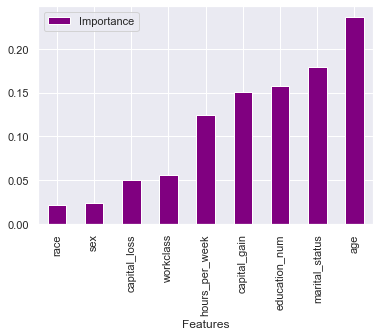

In [48]:
#Setup Random Forest
clf=RandomForestClassifier(n_estimators=100)
#Fit the model
clf.fit(X,y)

#Random Forest Importance Visualization

#get the importance of the resulting features
importances = clf.feature_importances_

#create a data frame for visualization
final_df = pd.DataFrame({"Features": X.columns, "Importance":importances})
final_df.set_index('Importance')

#sort in ascending order to better visualize
final_df = final_df.sort_values('Importance')

#Plot the feature importances in bars
final_df.plot.bar(x = 'Features', color = 'purple')

In [49]:
#Permutation Based Feature Importance
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(clf, x_test, y_test)

Text(0.5, 0, 'Permutation Importance')

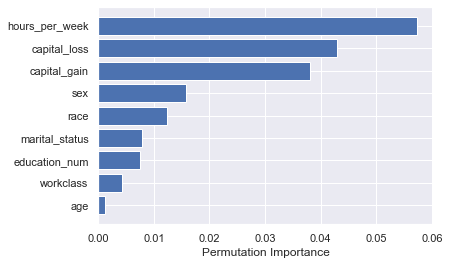

In [50]:
#Visualize the Permutation Based Feature Importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns, perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [51]:
#This will take a long time...

clf=RandomForestClassifier()
kf=KFold(n_splits=3)
max_features=np.array([1,2,3,4,5,6,7])
n_estimators=np.array([25,50,100,150,200])
min_samples_leaf=np.array([25,50,75,100])
param_grid=dict(n_estimators=n_estimators,max_features=max_features,min_samples_leaf=min_samples_leaf)
grid=GridSearchCV(estimator=clf,param_grid=param_grid,cv=kf)
gres=grid.fit(x_train,y_train)
print("Best",gres.best_score_)
print("params",gres.best_params_)

Best 0.8531927591008553
params {'max_features': 4, 'min_samples_leaf': 25, 'n_estimators': 150}


In [52]:
#Fit the model with the tuned parameters
clf = RandomForestClassifier(n_estimators=150, max_features = 4, min_samples_leaf = 25)
clf.fit(x_train, y_train)

RandomForestClassifier(max_features=4, min_samples_leaf=25, n_estimators=150)

<AxesSubplot:xlabel='Features'>

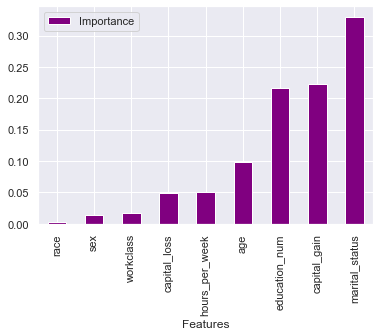

In [53]:
#get the importance of the resulting features
importances = clf.feature_importances_

#create a data frame for visualization
final_df = pd.DataFrame({"Features": X.columns, "Importance":importances})
final_df.set_index('Importance')

#sort in ascending order to better visualize
final_df = final_df.sort_values('Importance')

#Plot the feature importances in bars
final_df.plot.bar(x = 'Features', color = 'purple')

In [54]:
final_df

,Features,Importance
4,race,0.002952
5,sex,0.013527
1,workclass,0.016798
7,capital_loss,0.049344
8,hours_per_week,0.050807
0,age,0.097910
2,education_num,0.216205
6,capital_gain,0.222493
3,marital_status,0.329963


In [55]:
#Make Predictions
pred = clf.predict(x_test)
pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [56]:
print("Accuracy: %f " % (100*accuracy_score(y_test, pred)))

Accuracy: 85.232404 


In [57]:
#Let's try again, dropping least important columns
df2=df.drop(['race'], axis=1)
df2_test=df_test.drop(['race'], axis=1)

#Split data into train, test, split
X=df2.iloc[:,0:-1]
y=df2.iloc[:,-1]
print(X.head())
print(y.head())
x_train = X
y_train = y
x_test = df2_test.iloc[:,0:-1]
y_test = df2_test.iloc[:,-1]

#Fit the model with the tuned parameters
clf = RandomForestClassifier(n_estimators=150, max_features = 4, min_samples_leaf = 25)
clf.fit(x_train, y_train)

#Make Predictions
pred = clf.predict(x_test)
pred

print("Accuracy: %f " % (100*accuracy_score(y_test, pred)))

   age  workclass  education_num  marital_status  sex  capital_gain  \
0   39          5             13               1    1          2174   
1   50          4             13               0    1             0   
2   38          2              9               1    1             0   
3   53          2              7               0    1             0   
4   28          2             13               0    0             0   

   capital_loss  hours_per_week  
0             0              40  
1             0              13  
2             0              40  
3             0              40  
4             0              40  
0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64
Accuracy: 85.239044 


In [58]:
#Let's try again, dropping least important columns
df2=df.drop(['race', 'sex'], axis=1)
df2_test=df_test.drop(['race', 'sex'], axis=1)

#Split data into train, test, split
X=df2.iloc[:,0:-1]
y=df2.iloc[:,-1]
print(X.head())
print(y.head())
x_train = X
y_train = y
x_test = df2_test.iloc[:,0:-1]
y_test = df2_test.iloc[:,-1]

#Fit the model with the tuned parameters
clf = RandomForestClassifier(n_estimators=150, max_features = 4, min_samples_leaf = 25)
clf.fit(x_train, y_train)

#Make Predictions
pred = clf.predict(x_test)
pred

print("Accuracy: %f " % (100*accuracy_score(y_test, pred)))

   age  workclass  education_num  marital_status  capital_gain  capital_loss  \
0   39          5             13               1          2174             0   
1   50          4             13               0             0             0   
2   38          2              9               1             0             0   
3   53          2              7               0             0             0   
4   28          2             13               0             0             0   

   hours_per_week  
0              40  
1              13  
2              40  
3              40  
4              40  
0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64
Accuracy: 85.179283 


In [59]:
#Let's try again, dropping least important columns
df2=df.drop(['race', 'sex', 'workclass'], axis=1)
df2_test=df_test.drop(['race', 'sex', 'workclass'], axis=1)

#Split data into train, test, split
X=df2.iloc[:,0:-1]
y=df2.iloc[:,-1]
print(X.head())
print(y.head())
x_train = X
y_train = y
x_test = df2_test.iloc[:,0:-1]
y_test = df2_test.iloc[:,-1]

#Fit the model with the tuned parameters
clf = RandomForestClassifier(n_estimators=150, max_features = 4, min_samples_leaf = 25)
clf.fit(x_train, y_train)

#Make Predictions
pred = clf.predict(x_test)
pred

print("Accuracy: %f " % (100*accuracy_score(y_test, pred)))

   age  education_num  marital_status  capital_gain  capital_loss  \
0   39             13               1          2174             0   
1   50             13               0             0             0   
2   38              9               1             0             0   
3   53              7               0             0             0   
4   28             13               0             0             0   

   hours_per_week  
0              40  
1              13  
2              40  
3              40  
4              40  
0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64
Accuracy: 85.066401 


Not seeing any accuracy gains by dropping the variables...

In [60]:
#Split data into train, test, split
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]
print(X.head())
print(y.head())
x_train = X
y_train = y
x_test = df_test.iloc[:,0:-1]
y_test = df_test.iloc[:,-1]

#Fit the model with the tuned parameters
clf = RandomForestClassifier(n_estimators=150, max_features = 4, min_samples_leaf = 25)
clf.fit(x_train, y_train)

#Make Predictions
pred = clf.predict(x_test)
pred

print("Accuracy: %f " % (100*accuracy_score(y_test, pred)))

   age  workclass  education_num  marital_status  race  sex  capital_gain  \
0   39          5             13               1     4    1          2174   
1   50          4             13               0     4    1             0   
2   38          2              9               1     4    1             0   
3   53          2              7               0     2    1             0   
4   28          2             13               0     2    0             0   

   capital_loss  hours_per_week  
0             0              40  
1             0              13  
2             0              40  
3             0              40  
4             0              40  
0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64
Accuracy: 85.219124 


In [61]:
#What's our AUC look like..
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, pred)
print(roc_value)

0.7678944613627713


In [62]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve


def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

Recall Baseline: 1.0 Test: 0.6 Train: 0.62
Precision Baseline: 0.25 Test: 0.75 Train: 0.77
Roc Baseline: 0.5 Test: 0.91 Train: 0.92


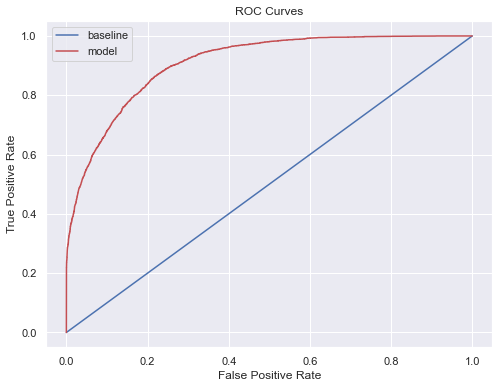

In [63]:
train_rf_predictions = clf.predict(x_train)
train_rf_probs = clf.predict_proba(x_train)[:, 1]

rf_predictions = clf.predict(x_test)
rf_probs = clf.predict_proba(x_test)[:, 1]


evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

In [64]:
#Let's look at a Confusion Matrix

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[10606   754]
 [ 1472  2228]]


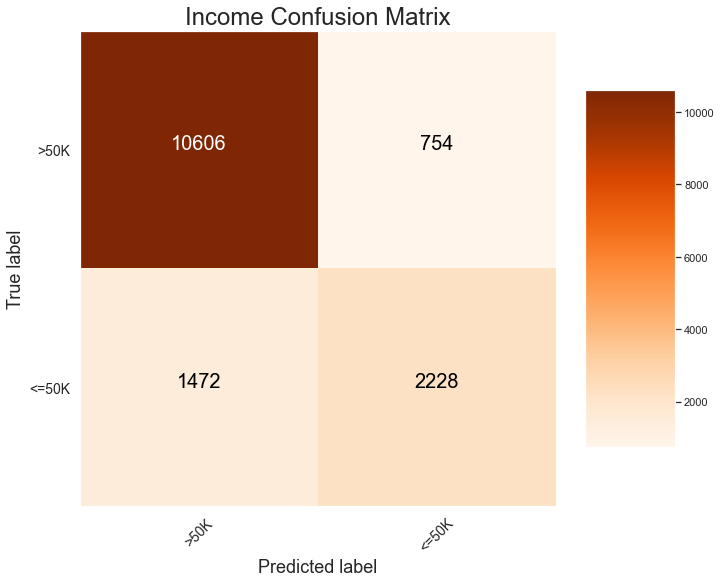

In [65]:
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes = ['>50K', '<=50K'],
                      title = 'Income Confusion Matrix')